[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI-Share-Note/AI-Lecture/blob/main/1.%20RNN%20%26%20LSTM.ipynb)

# Chapter 1. RNN 개념 이해

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
x_data = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7],
                  [6, 7, 8], [7, 8, 9], [8, 9, 10], [9, 10, 11], [10, 11, 12],
                  [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y_data = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 50, 60, 70])

# Chapter 2. LSTM 개념 이해

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

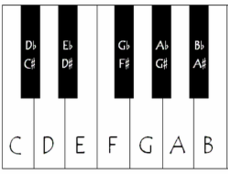

In [ ]:
image = cv2.imread("건반 Base.png")
cv2_imshow(image)

## 건반 명칭 : 도(c4), 도#(c8), 레(d4), 레#(d8), 미(e4), 파(f4), 파#(f8), 솔(g4), 솔#(g8), 라(a4), 라#(a8), 시(b4)

In [ ]:
import mlxtend 
print(mlxtend.__version__)

0.19.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.utils import to_categorical

In [ ]:
# 학습을 위한 변환
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'f8':9, 'g8':10, 'a8':11}

# 예측을 위한 변환
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'f8', 10:'g8', 11:'a8'}

In [ ]:
# 사용될 악보 데이터
sequence = ['a8', 'f8', 'e4', 'g8', 'd8', 'd4', 'c8', 'd8', 'f8',
            'g8', 'a8', 'a8', 'g4', 'a8', 'f8', 'f8', 'f8', 'g8', 
            'd8', 'd4', 'c8', 'f8', 'a8', 'a8', 'f8', 'f8', 'e4', 
            'd8', 'd8', 'd8', 'd8', 'd8', 'f8', 'f4', 'f8', 'f8', 
            'f8', 'f8', 'f8', 'g8', 'g4', 'a8', 'f8', 'e4', 'g8', 
            'd8', 'd4', 'c8', 'f8', 'a8', 'a8', 'f8', 'f8', 'e4']

# Chapter 3. Word2Vec 개념 이해

### 참고 : https://word2vec.kr/

# Chapter 4. Word2Vec과 LSTM을 활용하여 시퀸스 정보를 학습해보자 (feat. 영화 리뷰)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

import tensorflow_hub as hub
import numpy as np

In [ ]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
from tqdm import tqdm

def get_max_length(df):

    max_length = 0
    for row in tqdm(df['review']):
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))

    return max_length

In [ ]:
from tqdm import tqdm

def get_word2vec_enc(reviews):

    encoded_reviews = []
    for review in tqdm(reviews):
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    
    return encoded_reviews

In [ ]:
from tqdm import tqdm

def get_padded_encoded_reviews(encoded_reviews):

    padded_reviews_encoding = []
    for enc_review in tqdm(encoded_reviews):

        if max_length > enc_review.shape[0]:
            zero_padding_cnt = max_length - enc_review.shape[0]
            pad = np.zeros((1, 250))

            for i in range(zero_padding_cnt):
                enc_review = np.concatenate((pad, enc_review), axis=0)
        else:
            enc_review = enc_review[:max_length]
        padded_reviews_encoding.append(enc_review)

    return padded_reviews_encoding

In [ ]:
def sentiment_encode(sentiment):

    if sentiment == 'positive':
        return [1, 0]
    else:
        return [0, 1]

In [ ]:
def preprocess(df):

    reviews = df['review'].tolist()
    
    encoded_reviews = get_word2vec_enc(reviews)
    padded_encoded_reviews = get_padded_encoded_reviews(encoded_reviews)

    sentiments = df['sentiment'].tolist()
    encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]

    X = np.array(padded_encoded_reviews)
    Y = np.array(encoded_sentiment)

    return X, Y

In [ ]:
movie_reviews_train = [
         {'review': 'this is the best movie', 'sentiment': 'positive'},
         {'review': 'i recommend you watch this movie', 'sentiment': 'positive'},
         {'review': 'it was waste of money and time', 'sentiment': 'negative'},
         {'review': 'the worst movie ever', 'sentiment': 'negative'}
    ]
train_df = pd.DataFrame(movie_reviews_train)

max_length = get_max_length(train_df)

train_X, train_Y = preprocess(train_df)

100%|██████████| 4/4 [00:00<00:00, 1062.72it/s]


In [ ]:
movie_reviews_test = [
         {'review': 'it is better movie', 'sentiment': 'positive'},
         {'review': 'i suggest you see this movie', 'sentiment': 'positive'},
         {'review': 'it was just throwing 20 dollars away', 'sentiment': 'negative'},
         {'review': 'worse than any show', 'sentiment': 'negative'},
         {'review': 'nice movie, so love it', 'sentiment': 'positive'},
         {'review': 'terrible', 'sentiment': 'negative'}
    ]
test_df = pd.DataFrame(movie_reviews_test)

test_X, test_Y = preprocess(test_df)

100%|██████████| 6/6 [00:00<00:00, 1279.66it/s]


In [ ]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [ ]:
from tqdm import tqdm

movie_reviews = []
for sentence, label in tqdm(documents):
    
    words = []
    for word in sentence:
        if (word not in stop_words) and (word not in string.punctuation) and (not word.isnumeric()):
            words.append(word)
    
    movie_reviews.append({"review": " ".join(words), "sentiment": "positive" if label == "pos" else "negative"})

100%|██████████| 2000/2000 [00:03<00:00, 526.67it/s]


In [ ]:
from tqdm import tqdm

def predict(sentence):

    reviews = sentence.split(" ")

    words = []
    for word in tqdm(reviews):
        if (word not in stop_words) and (word not in string.punctuation) and (not word.isnumeric()):
            words.append(word)

    enc_review = embed(words)

    if max_length > len(enc_review):
        zero_padding_cnt = max_length - len(enc_review)
        pad = np.zeros((1, 250))

        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
    else:
        enc_review = enc_review[:max_length]

    print(enc_review.shape)
    y_predict = model.predict(np.expand_dims(enc_review, 0))
    y_predict = np.argmax(y_predict)
    y_predict = "positive" if y_predict == 0 else "negative"
    print("예측값 :", y_predict)